> # EcoBicis en Buenos Aires

***

> ### Introducción


La presente investigación tiene el fin de entender el uso general que se le dan a las bicicletas públicas de la Ciudad de Buenos Aires, mejor conocidas como Ecobicics, esto con el interés de saber: 

1. ¿Qué personas usan más estas bicicletas?
2. ¿su uso por género depende del tipo de bicicleta?
3. ¿Qué días es más frecuente el uso de estas bicicletas?
4. ¿cuáles con las estaciones de Ecobicis más usadas? Tanto de salida como de llegada

Este dataset nos brinda información de los viajes realizados en las bicicletas públicas de la ciudad en el año 2022. 
Datos extraídos del repositorio de bases de datos del gobierno de la ciudad https://data.buenosaires.gob.ar/.


En este data set podemos encontrar los siguientes atributos:


* **Id_recorrido:** Clave identificadora del recorrido

* **duracion_recorrido:** Diferencia entre la fecha de origen y la fecha fin en segundos

* **fecha_origen_recorrido:** Fecha de inicio

* **id_estacion_origen:** Id Estación de salida

* **nombre_estacion_origen:** Nombre estación de origen

* **direccion_estacion_origen:** dirección escrita de la estación de origen

* **long_estacion_origen:**	Longitud de la estación de origen

* **lat_estacion_origen:**	Latitud de la dirección de origen

* **fecha_destino_recorrido:**	Fecha final del recorrido

* **id_estacion_destino:**	Id estación final

* **nombre_estacion_destino:**	Nombre de la estación final

* **direccion_estacion_destino:** dirección escrita de la estación final

* **long_estacion_destino:** Longitud de la estación final

* **lat_estacion_destino:**	Latitud de la dirección final

* **id_usuario:** id usuario

* **modelo_bicicleta:**	modelo de bicicleta

* **Género:** Género del usuario



***

> ### Exploración y limpieza de los datos

In [12]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import distplot
from datetime import timedelta, datetime

#Carga de archivos
os.getcwd()
os.chdir('C:\\Users\\fernando\\Desktop\\JOCE\\DataScience2023\\1ra entrega 14.01.23\\datasets')
df = pd.read_csv('trips_2022.csv')

#Modificación de los datos
df = df.drop(columns = ['Unnamed: 0', 'X'])
df["fecha_origen_recorrido"]= pd.to_datetime(df["fecha_origen_recorrido"], format="%Y-%m-%d %H:%M:%S")
df["fecha_destino_recorrido"]= pd.to_datetime(df["fecha_destino_recorrido"], format="%Y-%m-%d %H:%M:%S")
df['Género'] = df['Género'].replace(['MALE'], 'Masculino')
df['Género'] = df['Género'].replace(['FEMALE'], 'Femenino')
df['Género'] = df['Género'].replace(['OTHER'], 'Otro')
df['nombre_estacion_origen'] = df['nombre_estacion_origen'].str.lower()
df['nombre_estacion_origen']=df['nombre_estacion_origen'].str.slice(start=6)
df['nombre_estacion_destino'] = df['nombre_estacion_destino'].str.lower()
df['nombre_estacion_destino']=df['nombre_estacion_destino'].str.slice(start=6)


#Encontramos datos donde la duracion es de mas de 12 horas de uso, por lo que estos los consideramos como datos erroneos y se eliminan
x = df["fecha_destino_recorrido"] - df["fecha_origen_recorrido"]
df["duracion_recorrido"] = x.loc[x < np.timedelta64(12, 'h')]

#Columnas agragadas
df["duracion_recorrido_min"] = df['duracion_recorrido'].astype('timedelta64[m]').astype(float)
df['dia_semana'] = df["fecha_origen_recorrido"].apply(lambda x: x.strftime("%A"))
df['dia_semana'] = df['dia_semana'].replace(['Monday'], 'Lunes')
df['dia_semana'] = df['dia_semana'].replace(['Tuesday'], 'Martes')
df['dia_semana'] = df['dia_semana'].replace(['Wednesday'], 'Miércoles')
df['dia_semana'] = df['dia_semana'].replace(['Thursday'], 'Jueves')
df['dia_semana'] = df['dia_semana'].replace(['Friday'], 'Viernes')
df['dia_semana'] = df['dia_semana'].replace(['Saturday'], 'Sábado')
df['dia_semana'] = df['dia_semana'].replace(['Sunday'], 'Domingo')
df['mes'] = df["fecha_origen_recorrido"].apply(lambda x: x.strftime("%m"))
df['mes2'] = df["fecha_origen_recorrido"].apply(lambda x: x.strftime("%m"))
df['mes2'] = df['mes2'].replace(['01'], 'Enero')
df['mes2'] = df['mes2'].replace(['02'], 'Febrero')
df['mes2'] = df['mes2'].replace(['03'], 'Marzo')
df['mes2'] = df['mes2'].replace(['04'], 'Abril')
df['mes2'] = df['mes2'].replace(['05'], 'Mayo')
df['mes2'] = df['mes2'].replace(['06'], 'Junio')
df['mes2'] = df['mes2'].replace(['07'], 'Julio')
df['mes2'] = df['mes2'].replace(['08'], 'Agosto')
df['mes2'] = df['mes2'].replace(['09'], 'Septiembre')
df['mes2'] = df['mes2'].replace(['10'], 'Octubre')
df['mes2'] = df['mes2'].replace(['11'], 'Noviembre')
df['mes2'] = df['mes2'].replace(['12'], 'Diciembre')
df['lugar'] = df['nombre_estacion_origen'].str.extract(r'(plaza|parque|hospital|ministerio|legislatura|plazoleta|facultad|universidad|avenida|av|calle)')
df['lugar'] = df['lugar'].replace(['plazoleta'], 'plaza')
df['lugar'] = df['lugar'].replace(['facultad'], 'universidad')
df['lugar'] = df['lugar'].replace(['av'], 'avenida')

print(df)

display(df.info())

              Id_recorrido duracion_recorrido fecha_origen_recorrido  \
0        13267975BAEcobici    0 days 00:43:30    2022-01-16 14:58:42   
1        13268526BAEcobici    0 days 00:09:05    2022-01-16 17:26:27   
2        13268400BAEcobici    0 days 00:34:21    2022-01-16 16:51:12   
3        13268164BAEcobici    0 days 03:32:28    2022-01-16 15:58:01   
4        13270010BAEcobici    0 days 01:12:17    2022-01-16 23:40:09   
...                    ...                ...                    ...   
2922800  16700616BAEcobici    0 days 00:12:14    2022-12-20 22:34:33   
2922801  16699813BAEcobici    0 days 00:12:44    2022-12-20 20:03:24   
2922802  16695096BAEcobici    0 days 01:12:08    2022-12-20 12:13:32   
2922803  16698330BAEcobici    0 days 00:23:25    2022-12-20 17:26:49   
2922804  16699538BAEcobici    0 days 02:07:29    2022-12-20 19:30:59   

        id_estacion_origen  nombre_estacion_origen  \
0               5BAEcobici            plaza italia   
1              51BAEcobici 

None

> ### Análisis y visualizaciones

Masculino    1678812
Femenino      907378
Otro          320309
Name: Género, dtype: int64


<BarContainer object of 3 artists>

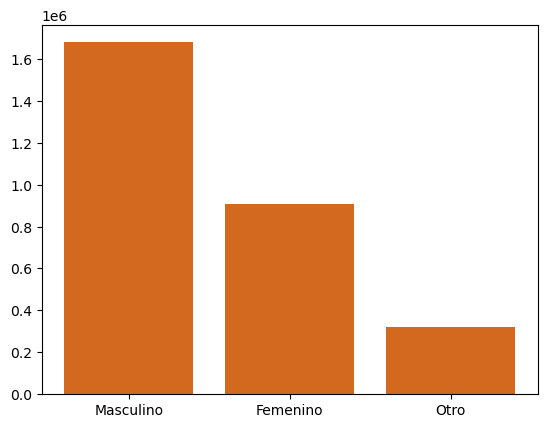

In [2]:
generos = df.Género.value_counts()

print(generos)

plt.bar(x=generos.index, height=generos.values, color='chocolate')

Podemos ver en este gráfico que las EcoBicis de la ciudad son más utilizadas por el sexo masculino.

<AxesSubplot:xlabel='Género', ylabel='count'>

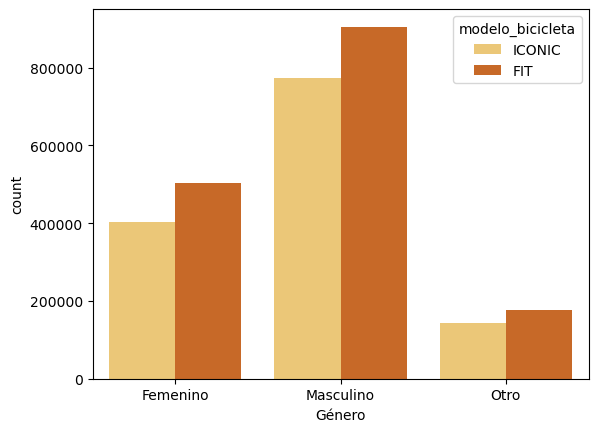

In [3]:
sns.countplot(data=df, x='Género', hue="modelo_bicicleta", color='darkorange', palette="YlOrBr")

También podemos ver un aumento en el uso de las bicicletas tipo "Iconic", por lo que podemos inferir en este caso, que no hay una preferencia para un tipo de bici en especifico según el sexo, sino que interfiere otra variable diferente.

'Duración media feneminio: [20.91]'

'Duración media masculino: [18.67]'

'Duración media otro: [19.86]'

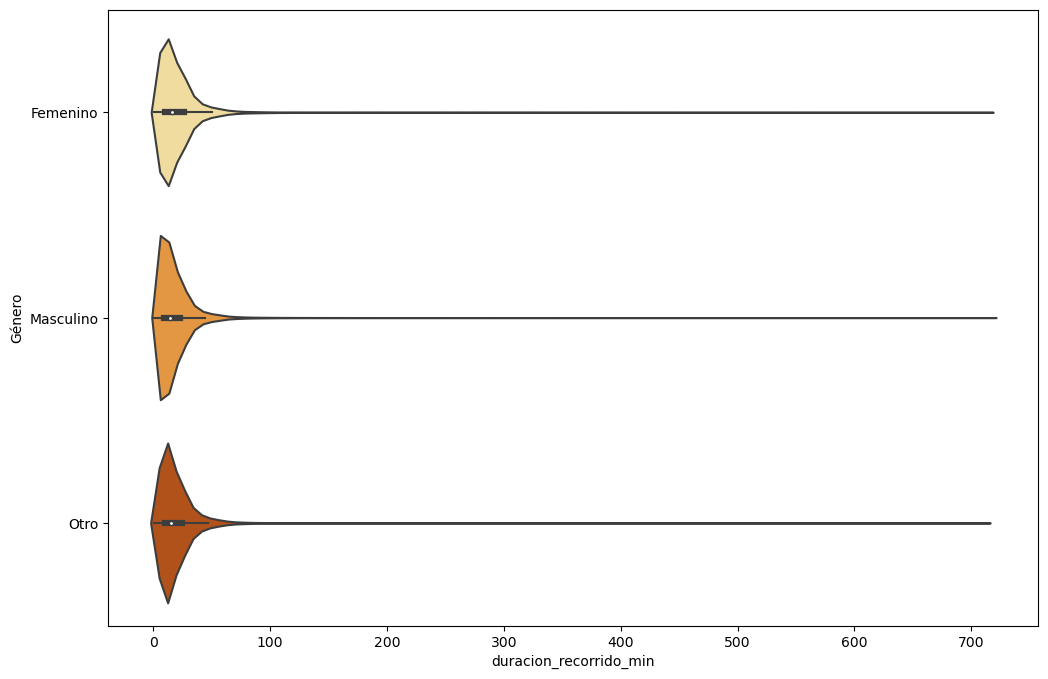

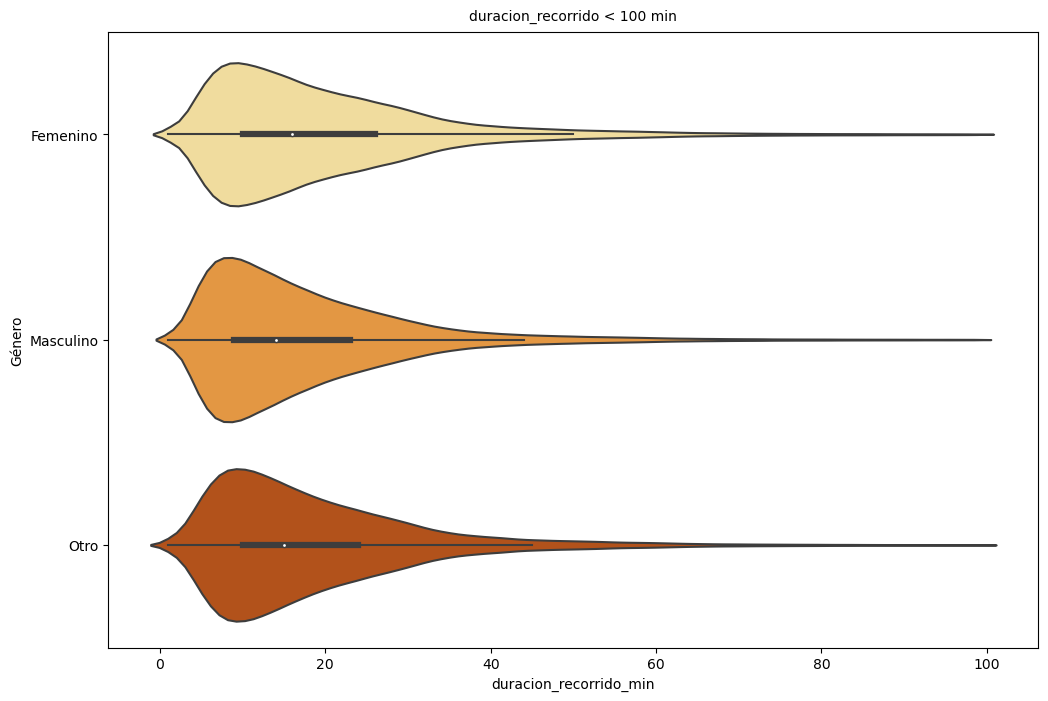

In [4]:
plt.figure(figsize=(12,8))
sns.violinplot( x="duracion_recorrido_min", y="Género", data=df, palette="YlOrBr", showmeans=True)

plt.figure(figsize=(12,8))
sns.violinplot( x="duracion_recorrido_min", y="Género", data=df.query("duracion_recorrido_min < 100"), palette="YlOrBr", showmeans=True)
plt.title("duracion_recorrido < 100 min", fontsize=10, verticalalignment='bottom')

Mfemenino = round(df[df['Género'] == "Femenino"].groupby('Género')['duracion_recorrido_min'].mean(),2)
display(f'Duración media feneminio: {Mfemenino.values}')

Mmasculino = round(df[df['Género'] == "Masculino"].groupby('Género')['duracion_recorrido_min'].mean(),2)
display(f'Duración media masculino: {Mmasculino.values}')

Motro = round(df[df['Género'] == "Otro"].groupby('Género')['duracion_recorrido_min'].mean(),2)
display(f'Duración media otro: {Motro.values}')


En este caso intentamos ver qué personas hacen recorridos más duraderos.Se muestran dos graficos, donde el primero los datos de forma general y en segundo lugar el mismo grafico disminuyendo los outliers para poder ver mejor los datos de box dentro del grafico.

Podemos ver segun los graficos y los datos numericos calculados que, el grupo femenino tienen una media mayor en la duracion de uso de las bicicletas, seguidas por el grupo catalogado como "otros" y en tercer lugar el grupo masculino.

llama la atencion que aunque el grupo masculino tiene mayor numero de recorridos, pasan menos tiempo en las bicis que el resto de la poblacion.

Cálculo del total y media de recoridos por mes

Enero 
Total: 191864 
Media de duracion en min: [20.81]

Febrero 
Total: 219116 
Media de duracion en min: [20.15]

Marzo 
Total: 266859 
Media de duracion en min: [19.59]

Abril 
Total: 253607 
Media de duracion en min: [19.41]

Mayo 
Total: 227669 
Media de duracion en min: [18.63]

Junio 
Total: 189364 
Media de duracion en min: [17.84]

Julio 
Total: 177903 
Media de duracion en min: [19.16]

Agosto 
Total: 271953 
Media de duracion en min: [19.16]

Septiembre 
Total: 303989 
Media de duracion en min: [18.98]

Octubre 
Total: 284004 
Media de duracion en min: [19.83]

Noviembre 
Total: 300310 
Media de duracion en min: [19.52]

Diciembre 
Total: 236167 
Media de duracion en min: [20.75]



C:\Users\fernando\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

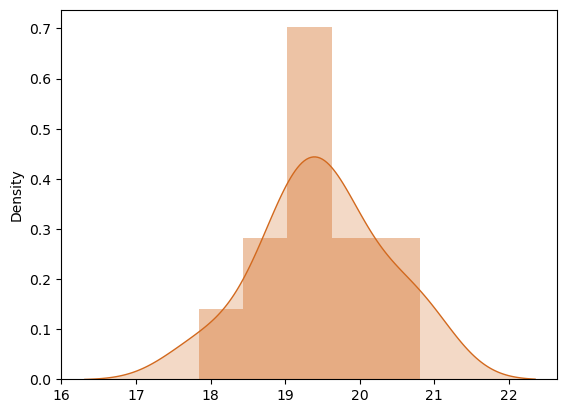

In [5]:
Mmeses= df.groupby('mes')['duracion_recorrido_min'].mean()

print('Cálculo del total y media de recoridos por mes\n' )

tenero = (df['mes'] == "01" ).sum()
Menero = round(df[df['mes'] == "01"].groupby('mes')['duracion_recorrido_min'].mean(),2)
print(f'Enero \nTotal: {tenero} \nMedia de duracion en min: {Menero.values}\n')

tfebrero = (df['mes'] == "02" ).sum()
Mfebrero = round(df[df['mes'] == "02"].groupby('mes')['duracion_recorrido_min'].mean(),2)
print(f'Febrero \nTotal: {tfebrero} \nMedia de duracion en min: {Mfebrero.values}\n')

tmarzo = (df['mes'] == "03" ).sum()
Mmarzo = round(df[df['mes'] == "03"].groupby('mes')['duracion_recorrido_min'].mean(),2)
print(f'Marzo \nTotal: {tmarzo} \nMedia de duracion en min: {Mmarzo.values}\n')

tabril = (df['mes'] == "04" ).sum()
Mabril = round(df[df['mes'] == "04"].groupby('mes')['duracion_recorrido_min'].mean(),2)
print(f'Abril \nTotal: {tabril} \nMedia de duracion en min: {Mabril.values}\n')

tmayo = (df['mes'] == "05" ).sum()
Mmayo = round(df[df['mes'] == "05"].groupby('mes')['duracion_recorrido_min'].mean(),2)
print(f'Mayo \nTotal: {tmayo} \nMedia de duracion en min: {Mmayo.values}\n')

tjunio = (df['mes'] == "06" ).sum()
Mjunio = round(df[df['mes'] == "06"].groupby('mes')['duracion_recorrido_min'].mean(),2)
print(f'Junio \nTotal: {tjunio} \nMedia de duracion en min: {Mjunio.values}\n')

tjulio = (df['mes'] == "07" ).sum()
Mjulio = round(df[df['mes'] == "07"].groupby('mes')['duracion_recorrido_min'].mean(),2)
print(f'Julio \nTotal: {tjulio} \nMedia de duracion en min: {Mjulio.values}\n')

tagosto = (df['mes'] == "08" ).sum()
Magosto = round(df[df['mes'] == "08"].groupby('mes')['duracion_recorrido_min'].mean(),2)
print(f'Agosto \nTotal: {tagosto} \nMedia de duracion en min: {Magosto.values}\n')

tseptiembre = (df['mes'] == "09" ).sum()
Mseptiembre = round(df[df['mes'] == "09"].groupby('mes')['duracion_recorrido_min'].mean(),2)
print(f'Septiembre \nTotal: {tseptiembre} \nMedia de duracion en min: {Mseptiembre.values}\n')

toctubre = (df['mes'] == "10" ).sum()
Moctubre = round(df[df['mes'] == "10"].groupby('mes')['duracion_recorrido_min'].mean(),2)
print(f'Octubre \nTotal: {toctubre} \nMedia de duracion en min: {Moctubre.values}\n')

tnoviembre = (df['mes'] == "11" ).sum()
Mnoviembre = round(df[df['mes'] == "11"].groupby('mes')['duracion_recorrido_min'].mean(),2)
print(f'Noviembre \nTotal: {tnoviembre} \nMedia de duracion en min: {Mnoviembre.values}\n')

tdiciembre = (df['mes'] == "12" ).sum()
Mdiciembre = round(df[df['mes'] == "12"].groupby('mes')['duracion_recorrido_min'].mean(),2)
print(f'Diciembre \nTotal: {tdiciembre} \nMedia de duracion en min: {Mdiciembre.values}\n')

sns.distplot( a=Mmeses.values, hist=True, kde=True, kde_kws={"shade": True}, color='chocolate')

En este caso podemos ver que la duracion media mensual para el año 2022 fue de aproximadamente 19.30 minutos 

mes2
Julio         177903
Junio         189364
Enero         191864
Febrero       219116
Mayo          227669
Diciembre     236167
Abril         253607
Marzo         266859
Agosto        271953
Octubre       284004
Noviembre     300310
Septiembre    303989
Name: mes2, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Enero'),
  Text(1, 0, 'Febrero'),
  Text(2, 0, 'Marzo'),
  Text(3, 0, 'Abril'),
  Text(4, 0, 'Mayo'),
  Text(5, 0, 'Junio'),
  Text(6, 0, 'Julio'),
  Text(7, 0, 'Agosto'),
  Text(8, 0, 'Septiembre'),
  Text(9, 0, 'Octubre'),
  Text(10, 0, 'Noviembre'),
  Text(11, 0, 'Diciembre')])

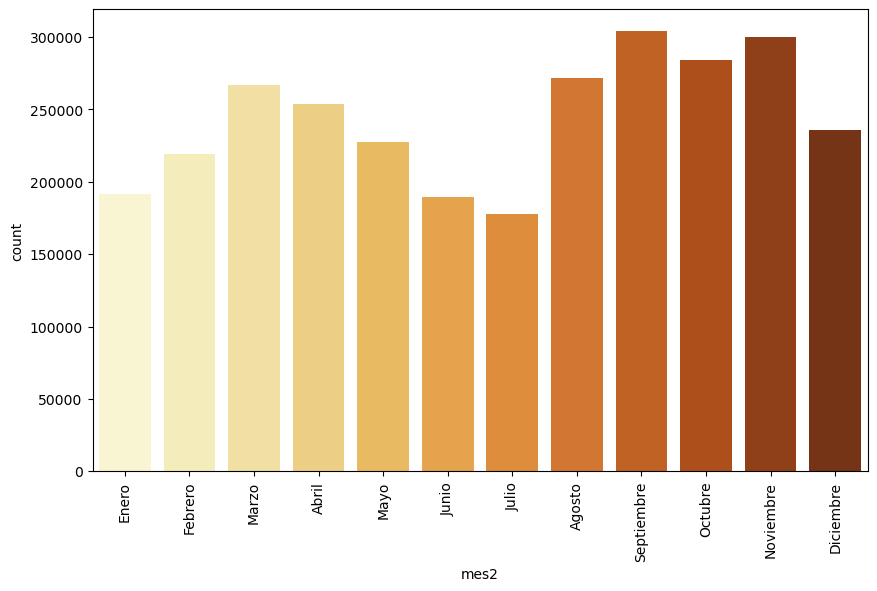

In [6]:
tmensual= df.groupby('mes2')['mes2'].count().sort_values()
print(tmensual)

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='mes2', color='darkorange', palette="YlOrBr")
plt.xticks(rotation=90)

<AxesSubplot:xlabel='Género', ylabel='count'>

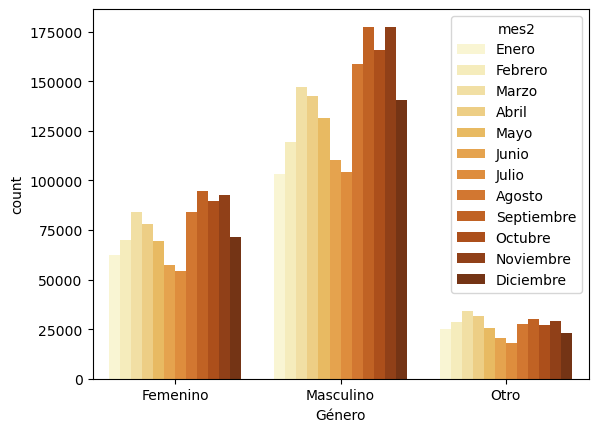

In [7]:
sns.countplot(data=df, x='Género', hue="mes2", color='darkorange', palette="YlOrBr")


En este grafico podemos ver la cantidad de recoridos realizados por mes en el año 2022, por lo que podemos ver que en los meses de primavera (septiembre, octubre y nomviembre) es cuando estas bicis tienen un mayor uso, y por otra parte los meses de invierno (junio y julio) son los meses donde menos se utilizan las Ecobicis.

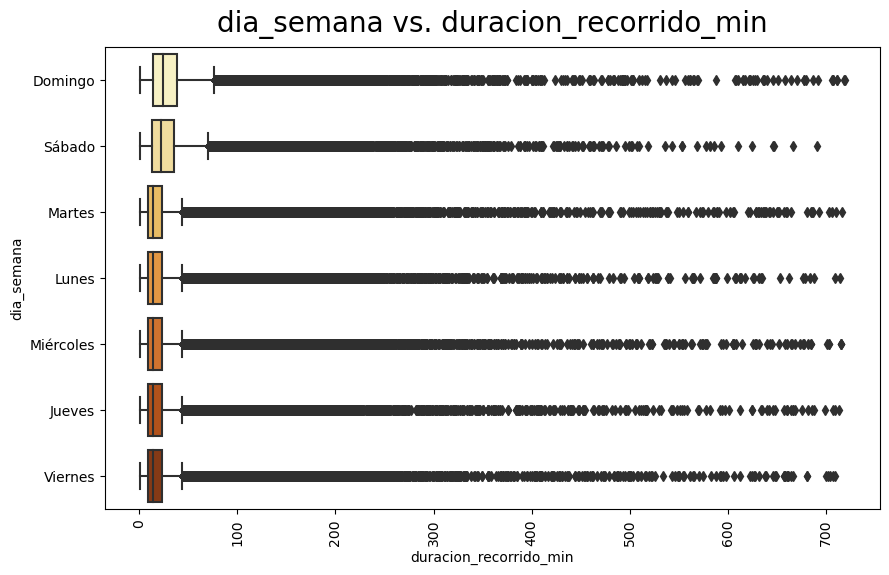

In [8]:
plt.figure(figsize=(10,6))
sns.boxplot(x= df["duracion_recorrido_min"], y = df['dia_semana'],  data = df, palette="YlOrBr") 
plt.title("dia_semana vs. duracion_recorrido_min", fontsize=20, verticalalignment='bottom')
plt.xticks(rotation=90);

En este grafico podemos ver que los dias en los que se utilizan mas las EcoBicis son los dias de fin de semana, por lo que podemos ver que podemos asumir que mayormente se usan con un fin recreacional.

parque las heras           25172
facultad de derecho        25843
carlos gardel              25991
acuña de figueroa          25993
godoy cruz y libertador    27015
retiro ii                  28125
congreso                   28592
plaza italia               28659
constitución               31598
pacifico                   35521
Name: nombre_estacion_origen, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'pacifico'),
  Text(1, 0, 'constitución'),
  Text(2, 0, 'plaza italia'),
  Text(3, 0, 'congreso'),
  Text(4, 0, 'retiro ii'),
  Text(5, 0, 'godoy cruz y libertador'),
  Text(6, 0, 'acuña de figueroa'),
  Text(7, 0, 'carlos gardel'),
  Text(8, 0, 'facultad de derecho'),
  Text(9, 0, 'parque las heras'),
  Text(10, 0, 'ospital de clínicas'),
  Text(11, 0, 'billinghurst'),
  Text(12, 0, 'parque del bajo'),
  Text(13, 0, 'humahuaca'),
  Text(14, 0, 'parque centenario')])

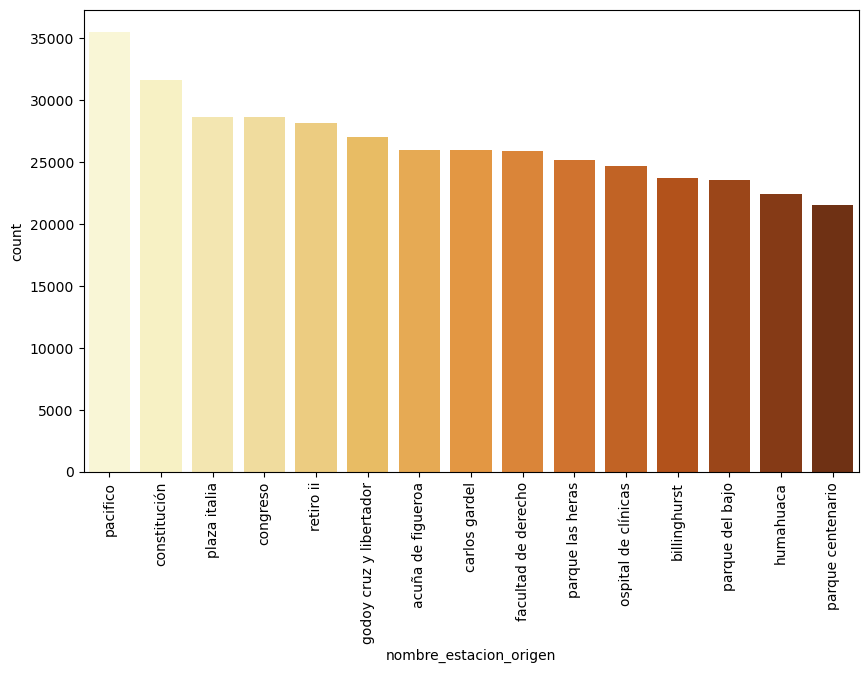

In [9]:
lugar10=df.nombre_estacion_origen.value_counts().iloc[:10].sort_values()
print(lugar10)

plt.figure(figsize=(10,6))
sns.countplot(x="nombre_estacion_origen",data=df, order=df.nombre_estacion_origen.value_counts().iloc[:15].index, palette="YlOrBr")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'pacifico'),
  Text(1, 0, 'congreso'),
  Text(2, 0, 'constitución'),
  Text(3, 0, 'plaza italia'),
  Text(4, 0, 'retiro ii'),
  Text(5, 0, 'godoy cruz y libertador'),
  Text(6, 0, 'carlos gardel'),
  Text(7, 0, 'facultad de derecho'),
  Text(8, 0, 'acuña de figueroa'),
  Text(9, 0, 'parque las heras'),
  Text(10, 0, 'ospital de clínicas'),
  Text(11, 0, 'billinghurst'),
  Text(12, 0, 'parque del bajo'),
  Text(13, 0, 'humahuaca'),
  Text(14, 0, 'barrancas de belgrano')])

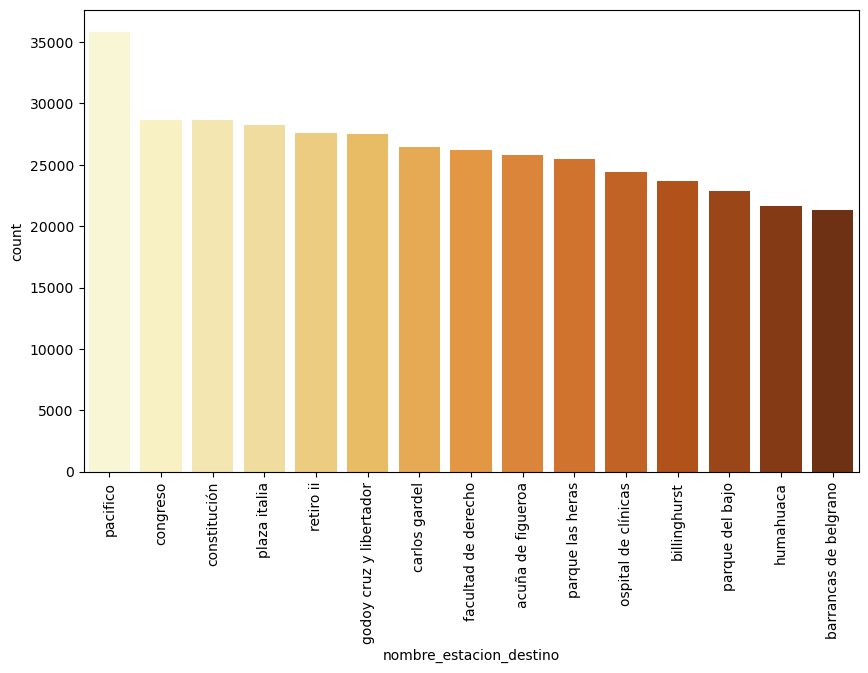

In [10]:
plt.figure(figsize=(10,6))
sns.countplot(x="nombre_estacion_destino",data=df, order=df.nombre_estacion_destino.value_counts().iloc[:15].index, palette="YlOrBr")
plt.xticks(rotation=90)